# Análise do dataset de cachorros

Nesse notebook vamos efetuar uma análise exploratória do dataset de cachorros a fim de entender as informações que lá existem e procurar algum padrão ou obter alguns insigths sobre o contexto.

No final vamos procurar criar um modelo que possa prever a raça do cachorro de acordo com as features levantadas.

Como premissa nosso modelo deve ter pelo menos 70% de acurácia e precisão.

## Importação do dataset

Inicialmente vamos importar o dataset, utilizando o pandas e vamos visulizar as informações através da biblioteca de gráficos Seaborn e Matplotlib.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
df = pd.read_json("cachorros.json")
df.head()

,Age,Weight,Height,Color,Personality,Origin,Sex,Breed
0,9,10.622986,38.361468,Castanho e Branco,Amável,"Reino Unido, Inglaterra, Grã-Betanha",0,Beagle
1,10,38.711239,56.613733,Creme,Afável,"Reino Unido, Escócia, Inglaterra",0,GoldenRetriver
2,8,46.696178,67.732389,Preto e prata,Confiante,Alemanha,1,PastorAlemao
3,4,8.174804,40.415624,Preto,Calmo,República Popular da China,1,Pug
4,4,9.459207,30.757251,Fulvo,Encantador,República Popular da China,0,Pug


## Análise incial do dataset

Vamos buscar visualizar como os dados estão categorizados, distribuídos e correlacionados.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1000 non-null   int64  
 1   Weight       1000 non-null   float64
 2   Height       1000 non-null   float64
 3   Color        1000 non-null   object 
 4   Personality  1000 non-null   object 
 5   Origin       1000 non-null   object 
 6   Sex          1000 non-null   int64  
 7   Breed        1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [4]:
df.Sex = df.Sex.astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          1000 non-null   int64   
 1   Weight       1000 non-null   float64 
 2   Height       1000 non-null   float64 
 3   Color        1000 non-null   object  
 4   Personality  1000 non-null   object  
 5   Origin       1000 non-null   object  
 6   Sex          1000 non-null   category
 7   Breed        1000 non-null   object  
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 55.9+ KB


In [6]:
df.Sex

0      0
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    0
999    1
Name: Sex, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [7]:
df.describe()

,Age,Weight,Height
count,1000.000000,1000.000000,1000.000000
mean,6.399000,28.487342,57.655208
std,3.850796,12.532904,11.498196
min,0.000000,8.006818,30.237276
25%,3.000000,16.525595,50.010007
50%,6.000000,32.588153,61.178374
75%,9.000000,37.364187,65.083681
max,15.000000,49.990144,77.853317


### Histograma

No histograma podemos visualizar a distribuição dos dados de acordo com a frequência que aparecem.

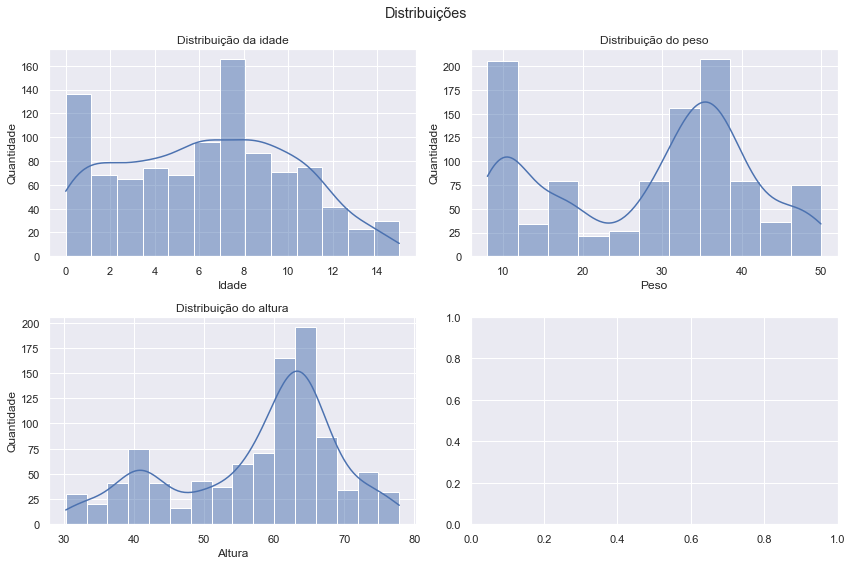

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

plt.suptitle('Distribuições')

sns.histplot(x='Age', data=df, kde=True, ax=ax[0][0]).set(title='Distribuição da idade', xlabel='Idade', ylabel='Quantidade')
sns.histplot(x='Weight', data=df, kde=True, ax=ax[0][1]).set(title='Distribuição do peso', xlabel='Peso', ylabel='Quantidade')
sns.histplot(x='Height', data=df, kde=True, ax=ax[1][0]).set(title='Distribuição do altura', xlabel='Altura', ylabel='Quantidade')

plt.tight_layout()
plt.show()

### Boxplot

O boxplot nos permitem visualizar como os dados estão distribuidos dentro dos quartiles e se existem outliers.

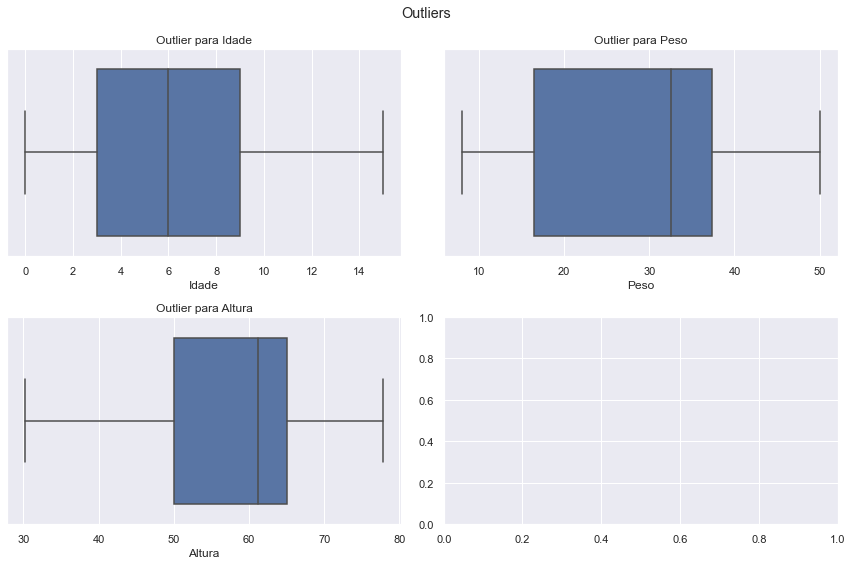

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

plt.suptitle('Outliers')

sns.boxplot(x='Age', data=df, ax=ax[0][0]).set(title='Outlier para Idade', xlabel='Idade')
sns.boxplot(x='Weight', data=df, ax=ax[0][1]).set(title='Outlier para Peso', xlabel='Peso')
sns.boxplot(x='Height', data=df, ax=ax[1][0]).set(title='Outlier para Altura', xlabel='Altura')

plt.tight_layout()
plt.show()

### Correlação 

Podemos agora identificar informações que possam ser correlacionadas. Por correlacionadas podemos entender que dada uma variável X outra variavel Y pode aumentar ou diminuir na mesma medida que X aumenta ou diminui.

Vale resaltar que correlação não implica em causualidade.

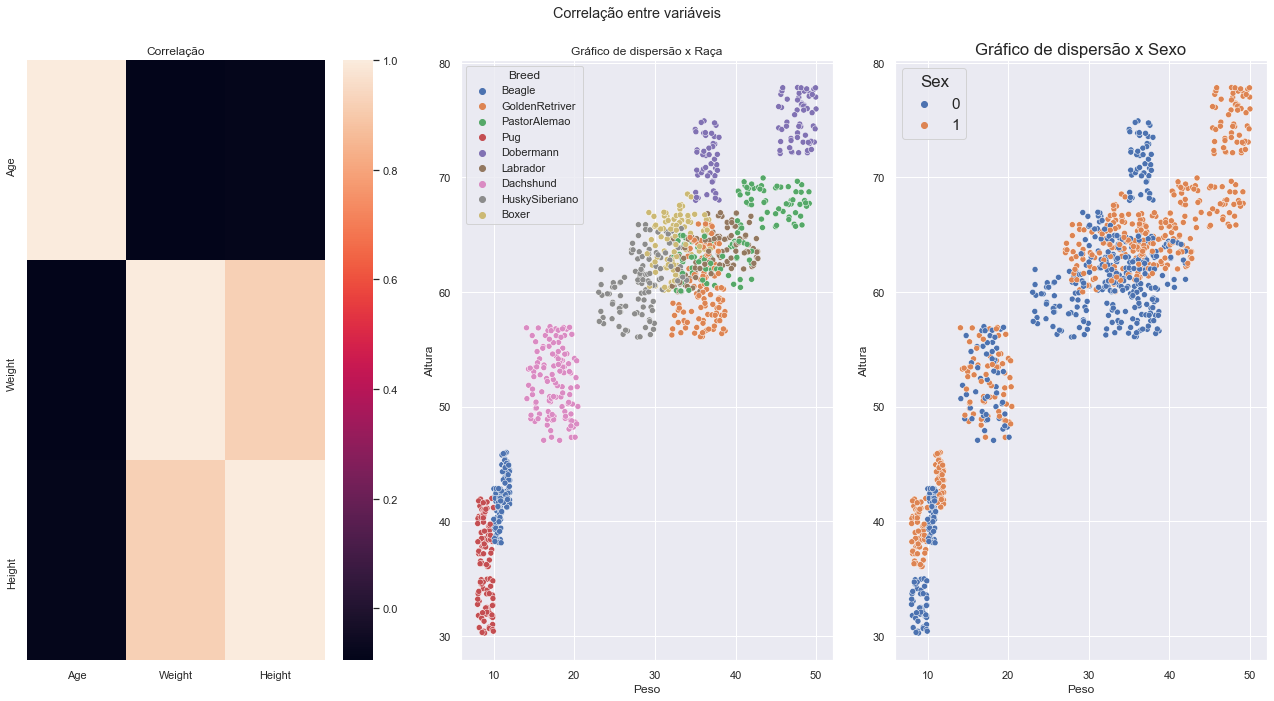

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 10))

plt.suptitle("Correlação entre variáveis")

corr = df.corr()
sns.heatmap(corr, ax=ax1).set(title='Correlação')

sns.scatterplot(x='Weight', y='Height', hue='Breed', data=df, ax=ax2).set(title='Gráfico de dispersão x Raça', xlabel='Peso', ylabel='Altura')
sns.set(font_scale=1.4)

sns.scatterplot(x='Weight', y='Height', hue='Sex', data=df, ax=ax3).set(title='Gráfico de dispersão x Sexo', xlabel='Peso', ylabel='Altura')
sns.set(font_scale=1.4)

plt.tight_layout()
plt.show()

#### Criação de coluna - Feature Engineering

In [11]:
df['Category'] = pd.cut(df['Weight'], bins=[0, 15, 30, 100], labels=['small', 'medium', 'big'])
df.head()

,Age,Weight,Height,Color,Personality,Origin,Sex,Breed,Category
0,9,10.622986,38.361468,Castanho e Branco,Amável,"Reino Unido, Inglaterra, Grã-Betanha",0,Beagle,small
1,10,38.711239,56.613733,Creme,Afável,"Reino Unido, Escócia, Inglaterra",0,GoldenRetriver,big
2,8,46.696178,67.732389,Preto e prata,Confiante,Alemanha,1,PastorAlemao,big
3,4,8.174804,40.415624,Preto,Calmo,República Popular da China,1,Pug,small
4,4,9.459207,30.757251,Fulvo,Encantador,República Popular da China,0,Pug,small


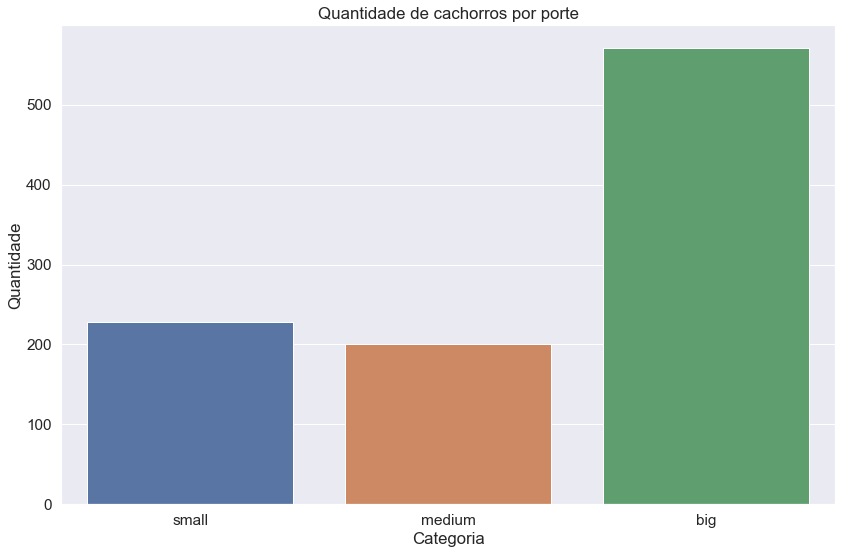

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x='Category', data=df).set(title='Quantidade de cachorros por porte', xlabel='Categoria', ylabel='Quantidade')
plt.tight_layout()
plt.show()

## Analise de variáveis categoricas

Vamos agora analisar as variaveis categoricas, ou seja, variáveis que são expressas por textos, podendo elas serem ordinais ou nominais.

### Cores

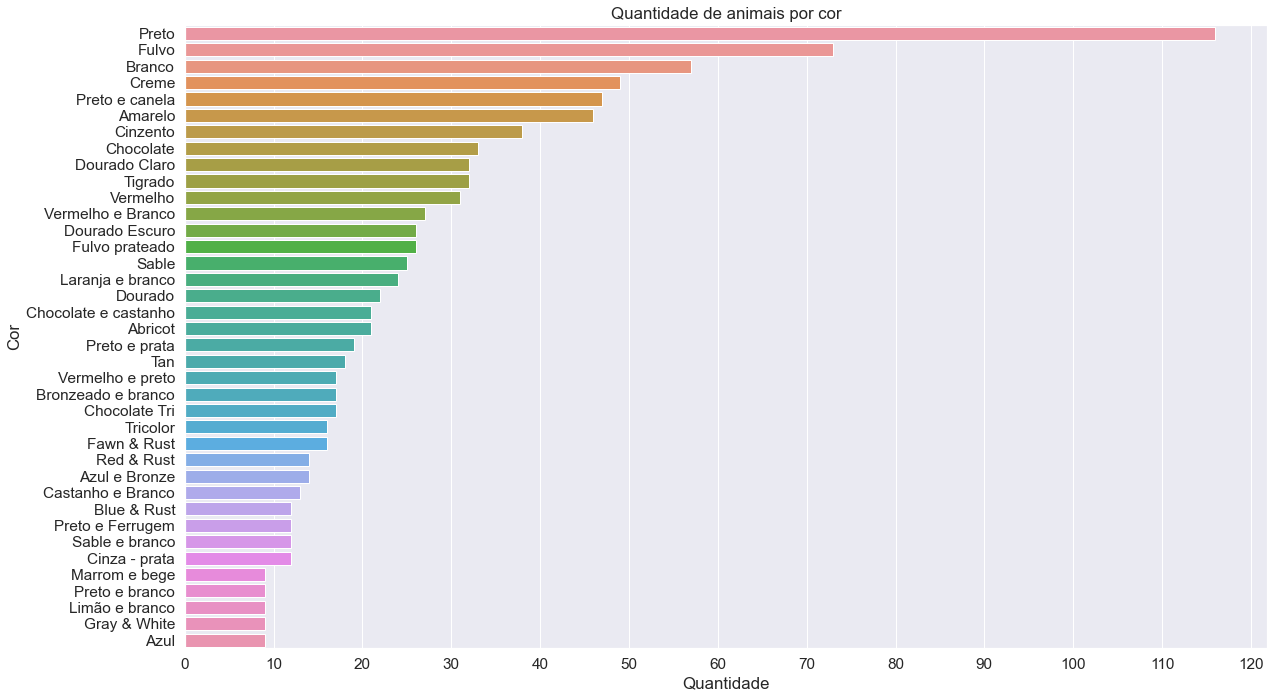

In [13]:
plt.figure(figsize=(18,10))
sns.countplot(data=df, y='Color', order=df.Color.value_counts().index).set(title='Quantidade de animais por cor', ylabel='Cor', xlabel='Quantidade', xticks=np.arange(0, 130, 10))
plt.tight_layout()
plt.show()

In [14]:
len(df.Color.value_counts().keys())

38

#### Transformação de colunas - Feature Engineering

Vamos transformar nossa única coluna que contem as cores dos cachorros em várias colunas booleanas (Verdadeiro/Falso), com todas as cores, assinalando quais cores aquele animal possue. 

In [15]:
d = pd.DataFrame(columns=['Cores'])
d = d.append({'Cores': ['Azul']}, ignore_index=True)
d = d.append({'Cores': ['Verde']}, ignore_index=True)
d = d.append({'Cores': ['Verde', 'Azul']}, ignore_index=True)
d

,Cores
0,[Azul]
1,[Verde]
2,"[Verde, Azul]"


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

label = MultiLabelBinarizer()
label.fit_transform(d['Cores'].values)

array([[1, 0],
       [0, 1],
       [1, 1]])

In [17]:
pd.DataFrame(label.fit_transform(d['Cores'].values), columns=label.classes_)

,Azul,Verde
0,1,0
1,0,1
2,1,1


##### Tratamento dos valores

Antes de iniciar o processo de criação de novas colunas, primeiro precisamos fazer um tratamento nos dados existentes, normalizando-os. 

* Remover caracteres especiais

* Converter a palavra em um vetor

* Traduzir as cores

In [18]:
dicionario = {
    'abricot': 'damasco',
    'tan': 'bronze',
    'fawn': 'fulvo',
    'rust': 'ferrugem',
    'red': 'vermelho',
    'blue': 'azul',
    'gray': 'cinza',
    'white': 'branco',
    'casbronzeadoho': 'castanho',
    'sable': 'areia'
}

def traduzir_palavras(text: str):
    
    for chave, valor in dicionario.items():
       text = text.replace(chave, valor)
    
    return text

In [19]:
def split_colors(text: str):
    text = ','.join(text.split(' e '))
    text = ','.join(text.split(' & '))
    text = ','.join(text.split(' - ')).lower()
    text = traduzir_palavras(text)
    return text.split(',')

In [20]:
df['Colors'] = df.Color.apply(split_colors)

In [21]:
label = MultiLabelBinarizer()
colors = label.fit_transform(df['Colors'])
df_colors = pd.DataFrame(colors, columns=label.classes_)
df_colors.columns

Index(['amarelo', 'areia', 'azul', 'bege', 'branco', 'bronze', 'bronzeado',
       'canela', 'casbronzeho', 'chocolate', 'chocolate tri', 'cinza',
       'cinzento', 'creme', 'damasco', 'dourado', 'dourado claro',
       'dourado escuro', 'ferrugem', 'fulvo', 'fulvo prateado', 'laranja',
       'limão', 'marrom', 'prata', 'preto', 'tigrado', 'tricolor', 'vermelho'],
      dtype='object')

In [22]:
len(df_colors.columns)

29

In [23]:
df = pd.concat([df, df_colors], axis=1)
df.head()

,Age,Weight,Height,Color,Personality,Origin,Sex,Breed,Category,Colors,...,fulvo,fulvo prateado,laranja,limão,marrom,prata,preto,tigrado,tricolor,vermelho
0,9,10.622986,38.361468,Castanho e Branco,Amável,"Reino Unido, Inglaterra, Grã-Betanha",0,Beagle,small,"[casbronzeho, branco]",...,0,0,0,0,0,0,0,0,0,0
1,10,38.711239,56.613733,Creme,Afável,"Reino Unido, Escócia, Inglaterra",0,GoldenRetriver,big,[creme],...,0,0,0,0,0,0,0,0,0,0
2,8,46.696178,67.732389,Preto e prata,Confiante,Alemanha,1,PastorAlemao,big,"[preto, prata]",...,0,0,0,0,0,1,1,0,0,0
3,4,8.174804,40.415624,Preto,Calmo,República Popular da China,1,Pug,small,[preto],...,0,0,0,0,0,0,1,0,0,0
4,4,9.459207,30.757251,Fulvo,Encantador,República Popular da China,0,Pug,small,[fulvo],...,1,0,0,0,0,0,0,0,0,0


#### Personalidade

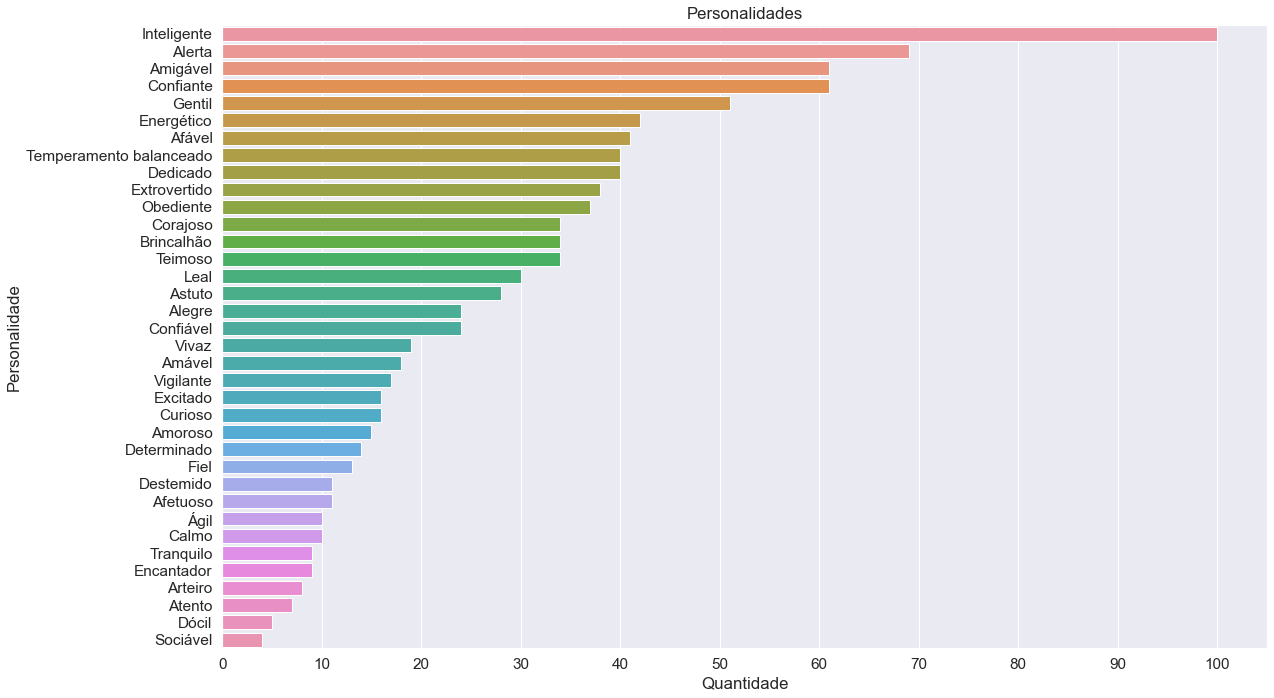

In [24]:
plt.figure(figsize=(18,10))
sns.countplot(y='Personality', data=df, order=df.Personality.value_counts().index).set(title='Personalidades', xlabel='Quantidade', ylabel='Personalidade', xticks=np.arange(0, 110, 10))
plt.tight_layout()
plt.show()

## Treinamento de um modelo

Vamos treinar um modelo para prever a raça de um cachorro. 

Primeiramente vamos dividir a base entre treino e teste com o objetivo de termos uma massa para treinamento e outra para vaildação a fim de validar se nosso modelo generaliza bem dados não vistos.

In [25]:
X = df[df.columns.difference(['Category', 'Color', 'Colors', 'Origin', 'Personality', 'Breed'])]
y = df['Breed']

Vamos utilizar cerca de 75% da base para treinamento e 25% para validação

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, SCORERS

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [27]:
print(X_train.shape)
print(y_train.shape)

(750, 33)
(750,)


In [28]:
print(X_test.shape)
print(y_test.shape)

(250, 33)
(250,)


#### Modelo Dummy

Vamos criar um modelo Dummy a fim de validar qual será nossa base line.

In [29]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

y_dummy = dummy.predict(X_train)

print(accuracy_score(y_train, y_dummy))
print(precision_score(y_train, y_dummy, average='weighted'))
print(classification_report(y_train, y_dummy))

0.132
0.13428871856830224
                precision    recall  f1-score   support

        Beagle       0.14      0.13      0.13        75
         Boxer       0.13      0.14      0.13        70
     Dachshund       0.11      0.11      0.11        91
     Dobermann       0.13      0.13      0.13        83
GoldenRetriver       0.13      0.14      0.13        79
HuskySiberiano       0.21      0.16      0.18        94
      Labrador       0.15      0.15      0.15        82
  PastorAlemao       0.09      0.10      0.10        93
           Pug       0.13      0.13      0.13        83

      accuracy                           0.13       750
     macro avg       0.13      0.13      0.13       750
  weighted avg       0.13      0.13      0.13       750



In [30]:
pd.DataFrame(confusion_matrix(y_train, y_dummy), columns=dummy.classes_, index=dummy.classes_)

,Beagle,Boxer,Dachshund,Dobermann,GoldenRetriver,HuskySiberiano,Labrador,PastorAlemao,Pug
Beagle,10,12,10,4,4,8,9,7,11
Boxer,5,10,9,12,5,6,4,12,7
Dachshund,5,13,10,11,16,5,5,12,14
Dobermann,12,5,9,11,10,9,11,8,8
GoldenRetriver,8,7,15,12,11,3,9,10,4
HuskySiberiano,12,10,8,11,9,15,6,16,7
Labrador,5,4,6,9,9,10,12,15,12
PastorAlemao,12,5,15,6,10,12,12,9,12
Pug,5,13,7,9,12,5,14,7,11


### Treinar um modelo mais inteligênte

In [31]:
from sklearn.svm import SVC

svc = SVC(random_state=10)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_train)

print(accuracy_score(y_train, y_pred))
print(precision_score(y_train, y_pred, average='weighted'))
print(classification_report(y_train, y_pred))

0.7093333333333334
0.7138708996148255
                precision    recall  f1-score   support

        Beagle       0.74      0.93      0.83        75
         Boxer       0.52      0.39      0.44        70
     Dachshund       1.00      1.00      1.00        91
     Dobermann       0.99      0.89      0.94        83
GoldenRetriver       0.64      0.58      0.61        79
HuskySiberiano       0.69      0.86      0.76        94
      Labrador       0.33      0.33      0.33        82
  PastorAlemao       0.55      0.61      0.58        93
           Pug       0.92      0.71      0.80        83

      accuracy                           0.71       750
     macro avg       0.71      0.70      0.70       750
  weighted avg       0.71      0.71      0.71       750



In [32]:
pd.DataFrame(confusion_matrix(y_train, y_pred), columns=svc.classes_, index=svc.classes_)

,Beagle,Boxer,Dachshund,Dobermann,GoldenRetriver,HuskySiberiano,Labrador,PastorAlemao,Pug
Beagle,70,0,0,0,0,0,0,0,5
Boxer,0,27,0,0,2,28,12,1,0
Dachshund,0,0,91,0,0,0,0,0,0
Dobermann,0,6,0,74,0,0,0,3,0
GoldenRetriver,0,3,0,0,46,3,25,2,0
HuskySiberiano,0,8,0,0,5,81,0,0,0
Labrador,0,4,0,0,8,3,27,40,0
PastorAlemao,0,4,0,1,11,3,17,57,0
Pug,24,0,0,0,0,0,0,0,59


In [33]:
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [34]:
result = cross_validate(SVC(), X_train, y_train, cv=10, scoring=('accuracy', 'precision_macro'))
result

{'fit_time': array([0.02400613, 0.02200389, 0.02300358, 0.02303362, 0.02196455,
        0.0229907 , 0.02498722, 0.02302909, 0.02300525, 0.02296329]),
 'score_time': array([0.00599432, 0.00599146, 0.00499916, 0.00500321, 0.00607038,
        0.00696898, 0.00599837, 0.00500345, 0.00602531, 0.00503778]),
 'test_accuracy': array([0.65333333, 0.69333333, 0.72      , 0.65333333, 0.68      ,
        0.61333333, 0.68      , 0.69333333, 0.70666667, 0.6       ]),
 'test_precision_macro': array([0.66444605, 0.68015873, 0.66031746, 0.61565595, 0.68117284,
        0.635097  , 0.68677249, 0.72229345, 0.65572391, 0.55163399])}

In [35]:
np.mean(result.get('test_accuracy'))

0.6693333333333333

In [36]:
y_pred = svc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

0.76
0.7692639591909158
                precision    recall  f1-score   support

        Beagle       0.94      0.97      0.96        34
         Boxer       0.65      0.68      0.67        22
     Dachshund       1.00      1.00      1.00        31
     Dobermann       1.00      0.82      0.90        28
GoldenRetriver       0.64      0.52      0.57        31
HuskySiberiano       0.70      0.83      0.76        23
      Labrador       0.35      0.38      0.36        24
  PastorAlemao       0.59      0.67      0.63        33
           Pug       0.96      0.92      0.94        24

      accuracy                           0.76       250
     macro avg       0.76      0.75      0.75       250
  weighted avg       0.77      0.76      0.76       250



In [37]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=svc.classes_, index=svc.classes_)

,Beagle,Boxer,Dachshund,Dobermann,GoldenRetriver,HuskySiberiano,Labrador,PastorAlemao,Pug
Beagle,33,0,0,0,0,0,0,0,1
Boxer,0,15,0,0,2,5,0,0,0
Dachshund,0,0,31,0,0,0,0,0,0
Dobermann,0,4,0,23,0,0,0,1,0
GoldenRetriver,0,0,0,0,16,1,12,2,0
HuskySiberiano,0,3,0,0,0,19,1,0,0
Labrador,0,0,0,0,2,1,9,12,0
PastorAlemao,0,1,0,0,5,1,4,22,0
Pug,2,0,0,0,0,0,0,0,22
